In [15]:
import pandas as pd
df = pd.read_csv('train.csv',sep=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

x = df[["Pclass","SibSp"]].to_numpy()
y = df[["Fare"]].to_numpy()

x = sm.add_constant(x)
model_prediksi = sm.OLS(y,x).fit()

print(model_prediksi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     233.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           3.89e-82
Time:                        05:44:37   Log-Likelihood:                -4555.8
No. Observations:                 891   AIC:                             9118.
Df Residuals:                     888   BIC:                             9132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.0901      3.979     26.411      0.0

In [17]:
df1 = pd.read_csv('test.csv',sep = ',')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
x_tes = df1[["Pclass","SibSp"]].to_numpy()
y_real = df1[["Fare"]].to_numpy()
y_name = df1[["Name"]].to_numpy()
x_tes = sm.add_constant(x_tes)
y_pred = model_prediksi.predict(x_tes)

In [19]:
import pandas as pd

# Assuming y_name, y_real, y_pred are numpy arrays
df = pd.DataFrame()
# ravel() is used to flatten the array in the case of y_nama, y_real, y_pred being 2-dimensional
df["Name"] = y_name.ravel()  # Convert to 1-dimensional array using ravel
df["Fare Real"] = y_real.ravel()  # Convert to 1-dimensional array using ravel
df["Fare Prediksi"] = y_pred.ravel()  # Convert to 1-dimensional array using ravel
df["ERROR"] = df["Fare Real"] - df["Fare Prediksi"]
df["PERSEN PREDIKSI"] = 1.0 - (abs(df["ERROR"]) / df["Fare Real"])
df["PERSEN"] = df["PERSEN PREDIKSI"] * 100

display(df)

,Name,Fare Real,Fare Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,"Kelly, Mr. James",7.8292,4.045966,3.783234,0.516779,51.677896
1,"Wilkes, Mrs. James (Ellen Needs)",7.0000,13.361987,-6.361987,0.091145,9.114468
2,"Myles, Mr. Thomas Francis",9.6875,37.727342,-28.039842,-1.894435,-189.443531
3,"Wirz, Mr. Albert",8.6625,4.045966,4.616534,0.467067,46.706676
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",12.2875,13.361987,-1.074487,0.912554,91.255445
...,...,...,...,...,...,...
413,"Spector, Mr. Woolf",8.0500,4.045966,4.004034,0.502604,50.260445
414,"Oliva y Ocana, Dona. Fermina",108.9000,71.408718,37.491282,0.655727,65.572744
415,"Saether, Mr. Simon Sivertsen",7.2500,4.045966,3.204034,0.558064,55.806425
416,"Ware, Mr. Frederick",8.0500,4.045966,4.004034,0.502604,50.260445


In [20]:
df.to_csv('hasil.csv')
datasets = pd.read_csv("/content/hasil.csv")
datasets

,Unnamed: 0,Name,Fare Real,Fare Prediksi,ERROR,PERSEN PREDIKSI,PERSEN
0,0,"Kelly, Mr. James",7.8292,4.045966,3.783234,0.516779,51.677896
1,1,"Wilkes, Mrs. James (Ellen Needs)",7.0000,13.361987,-6.361987,0.091145,9.114468
2,2,"Myles, Mr. Thomas Francis",9.6875,37.727342,-28.039842,-1.894435,-189.443531
3,3,"Wirz, Mr. Albert",8.6625,4.045966,4.616534,0.467067,46.706676
4,4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",12.2875,13.361987,-1.074487,0.912554,91.255445
...,...,...,...,...,...,...,...
413,413,"Spector, Mr. Woolf",8.0500,4.045966,4.004034,0.502604,50.260445
414,414,"Oliva y Ocana, Dona. Fermina",108.9000,71.408718,37.491282,0.655727,65.572744
415,415,"Saether, Mr. Simon Sivertsen",7.2500,4.045966,3.204034,0.558064,55.806425
416,416,"Ware, Mr. Frederick",8.0500,4.045966,4.004034,0.502604,50.260445


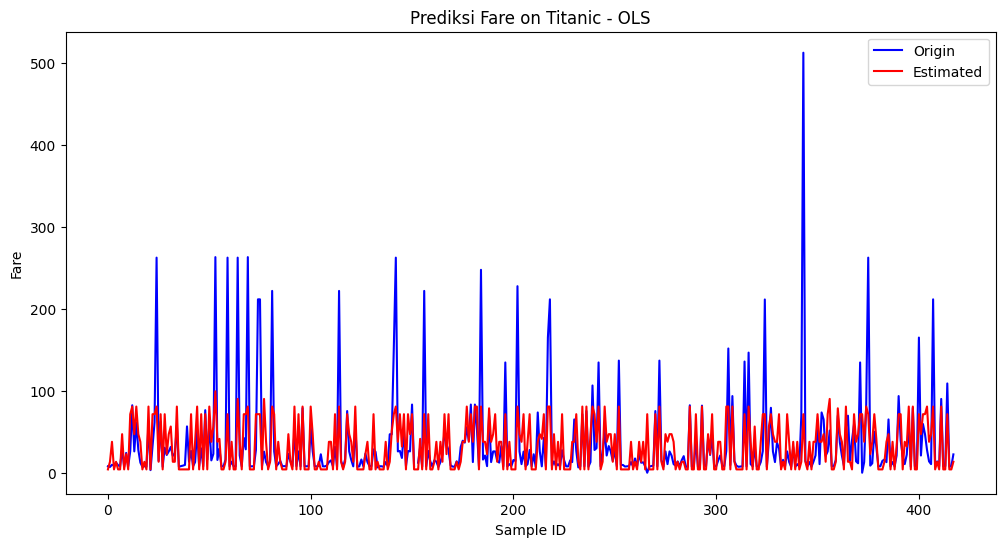

In [21]:
plt.figure(figsize=(12,6))
x = datasets.iloc[:, 0].values
plt.plot(x, datasets["Fare Real"], label="Origin",color="b")
plt.plot(x, datasets["Fare Prediksi"], label="Estimated",color="r")

plt.legend()
plt.xlabel('Sample ID')
plt.ylabel('Fare')
plt.title('Prediksi Fare on Titanic - OLS')
plt.show()